# PART 1: DEPENDENCIES AND LOADING DATA

In [ ]:
# Import our dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [ ]:
# Reading CSV file from the Resources folder into a pandas DataFrame

body_performance_df = pd.read_csv('/content/bodyPerformance.csv')
body_performance_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# PART 2: CLEANING DATA

In [ ]:
# Datatypes
body_performance_df.dtypes

,0
age,float64
gender,object
height_cm,float64
weight_kg,float64
body fat_%,float64
diastolic,float64
systolic,float64
gripForce,float64
sit and bend forward_cm,float64
sit-ups counts,float64


In [ ]:
# Unique values
body_performance_df.nunique()

,0
age,44
gender,2
height_cm,467
weight_kg,1398
body fat_%,527
diastolic,89
systolic,102
gripForce,550
sit and bend forward_cm,528
sit-ups counts,81


In [ ]:
len(body_performance_df)

13393

In [ ]:
# Renaming columns
body_performance_df.rename(columns={
    'age': 'Age',
    'gender': 'Gender',
    'height_cm': 'Height (cm)',
    'weight_kg': 'Weight (Kg)',
    'body fat_%': 'Body Fat %',
    'diastolic': 'Diastolic BP',
    'systolic': 'Systolic BP',
    'gripFroce': 'Grip Froce',
    'sit and bend forward_cm': 'Sit and Bend Froward (cm)',
    'sit-ups counts': 'Sit-Ups Counts',
    'broad jump_cm': 'Broad Jump (cm)',
    'class': 'Classification'
}, inplace=True)

body_performance_df.head()

,Age,Gender,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
# The values 'A' and 'B' are replaced with 0.
# The values 'C' and 'D' are replaced with 1.
body_performance_df['Classification'] = body_performance_df['Classification'].replace({'A':0, 'B':0, 'C':1 , 'D':1})
body_performance_df.head()



,Age,Gender,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0


In [ ]:
# Checking female and male count for accuracy
body_performance_df['Gender'].value_counts()

,count
Gender,
M,8467
F,4926


In [35]:
# number of females in the dataset
female_count = body_performance_df['Gender'].value_counts()['F']

# Sample an equal number of males
male_subset = body_performance_df[body_performance_df['Gender'] == 'M'].sample(female_count, random_state=42)

# female entries
female_subset = body_performance_df[body_performance_df['Gender'] == 'F']

# Concatenate the sampled male subset with all female entries
balanced_df = pd.concat([male_subset, female_subset])

# Update the original DataFrame with the balanced DataFrame
body_performance_df = balanced_df


body_performance_df['Gender'].value_counts()


,count
Gender,
M,4926
F,4926


In [20]:
body_performance_df['Gender'].value_counts()

,count
Gender,
M,4926
F,4926


Gender
M    4926
F    4926
Name: count, dtype: int64


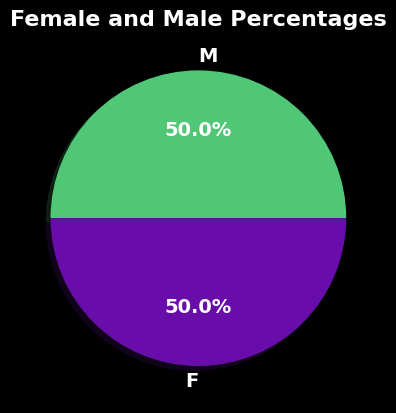

In [21]:
pie_chart_gender = body_performance_df['Gender'].value_counts()

print(pie_chart_gender)

# Updated colors to use the extracted bright green and fuchsia
colors = ['#50C677', '#680DA9', '#F8F8FF']

# Custom colors and a black background
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Pie chart with bold, larger text
ax.pie(pie_chart_gender, labels=pie_chart_gender.index, autopct='%1.1f%%', shadow=True, colors=colors[:len(pie_chart_gender)],
       textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14})
ax.set_title("Female and Male Percentages", color='white', fontsize=16, weight='bold')

plt.show()




In [22]:
body_performance_df.head()


,Age,Gender,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification
9399,30.0,M,171.5,75.6,18.3,90.0,136.0,38.5,14.7,43.0,221.0,1
8410,55.0,M,165.2,64.7,16.8,76.0,127.0,37.0,20.3,50.0,205.0,0
9327,26.0,M,176.2,84.8,17.5,80.0,134.0,44.6,11.5,62.0,216.0,0
1408,61.0,M,169.1,79.0,35.5,82.0,142.0,34.7,-12.8,37.0,161.0,1
9117,49.0,M,176.0,65.1,15.4,98.0,155.0,46.8,19.0,47.0,215.0,0


# PART 3" CREATE LABELS SET (y) AND FEATURES (X)

In [23]:
# Creating new DataFrame for transformed non-numeric data to numeric, Boolean data.

body_performance_numeric_df = pd.get_dummies(body_performance_df, columns=['Gender'], dtype=int)

# Displaying the first few rows
body_performance_numeric_df.head()

,Age,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification,Gender_F,Gender_M
9399,30.0,171.5,75.6,18.3,90.0,136.0,38.5,14.7,43.0,221.0,1,0,1
8410,55.0,165.2,64.7,16.8,76.0,127.0,37.0,20.3,50.0,205.0,0,0,1
9327,26.0,176.2,84.8,17.5,80.0,134.0,44.6,11.5,62.0,216.0,0,0,1
1408,61.0,169.1,79.0,35.5,82.0,142.0,34.7,-12.8,37.0,161.0,1,0,1
9117,49.0,176.0,65.1,15.4,98.0,155.0,46.8,19.0,47.0,215.0,0,0,1


In [24]:
# Initiating the LabelEncoder

le = LabelEncoder()

# Applying LabelEncoder to the classification column (the labels)

body_performance_numeric_df['Classification'] = le.fit_transform(body_performance_numeric_df['Classification'].values)

In [25]:
# Separating data into labels and features

y = body_performance_numeric_df['Classification']

X = body_performance_numeric_df.drop(columns=['Classification'])

In [26]:
# Classification column contains: A, B, C, D
# A=Great_Health B=Good_Health C=Average_Health D=Need_more_training
y.head()

,Classification
9399,1
8410,0
9327,0
1408,1
9117,0


In [27]:
# value counts for label (y) data
y.value_counts()

,count
Classification,
0,4969
1,4883


In [28]:
X.head()

,Age,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Gender_F,Gender_M
9399,30.0,171.5,75.6,18.3,90.0,136.0,38.5,14.7,43.0,221.0,0,1
8410,55.0,165.2,64.7,16.8,76.0,127.0,37.0,20.3,50.0,205.0,0,1
9327,26.0,176.2,84.8,17.5,80.0,134.0,44.6,11.5,62.0,216.0,0,1
1408,61.0,169.1,79.0,35.5,82.0,142.0,34.7,-12.8,37.0,161.0,0,1
9117,49.0,176.0,65.1,15.4,98.0,155.0,46.8,19.0,47.0,215.0,0,1


In [29]:
# value counts for features (X) data
X.value_counts()

Age   Height (cm)  Weight (Kg)  Body Fat %  Diastolic BP  Systolic BP  gripForce  Sit and Bend Froward (cm)  Sit-Ups Counts  Broad Jump (cm)  Gender_F  Gender_M
27.0  157.0        49.1         30.7        70.0          86.0         27.7        19.7                      51.0            167.0            1         0           2
21.0  148.0        42.0         22.8        62.0          104.0        22.4        23.8                      26.0            155.0            1         0           1
43.0  155.0        52.9         26.0        81.0          134.0        24.1        20.8                      33.0            146.0            1         0           1
42.0  184.7        91.6         27.3        90.0          151.0        44.6        13.1                      44.0            208.0            0         1           1
      184.9        85.9         26.2        99.0          147.0        39.2       -1.3                       39.0            196.0            0         1           1
                                                                                                                                                                   ..
27.0  162.5        57.3         28.0        79.0          122.0        19.9        1.8                       45.0            166.0            1         0           1
      162.6        51.5         20.8        75.0          112.0        24.4        28.5                      42.0            168.0            1         0           1
                   79.6         35.6        68.0          114.0        18.7       -3.6                       17.0            101.0            0         1           1
      162.7        58.9         27.7        70.0          142.0        31.8        19.9                      59.0            182.0            1         0           1
64.0  178.5        77.5         21.6        86.0          156.0        37.1        10.7                      46.0            157.0            0         1           1
Name: count, Length: 9851, dtype: int64

# PART 4: SPLIT DATA INTO TRAINING AND TESTING SETS

In [30]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape

(7389, 12)

# PART 5: FIT AND TRANSFORM DATA

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# PART 6: KERAS SEQUENTIAL MODEL CREATION

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

neural_network_model = tf.keras.models.Sequential()

# First hidden layer

neural_network_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=12))

# Second hidden layer

neural_network_model.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Output layer

neural_network_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
neural_network_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,501 (13.68 KB)

 Trainable params: 3,501 (13.68 KB)

 Non-trainable params: 0 (0.00 B)

# PART 7: COMPILE KERAS SEQUENTIAL MODEL AND TRAIN DATASET

In [33]:
# Compile the model

neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model

fit_model = neural_network_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7268 - loss: 0.5543
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8335 - loss: 0.3787
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3500
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.3334
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3373
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8708 - loss: 0.3088
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8680 - loss: 0.3079
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8676 - loss: 0.3051
Epoch 9/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8607 - loss: 0.3098
Epoch 10/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8624 - loss: 0.3163
Epoch 11/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8731 - loss: 0.2876
Epoch 12/100
231/231 ━━━━━━━━━━━━━━━━━━━━

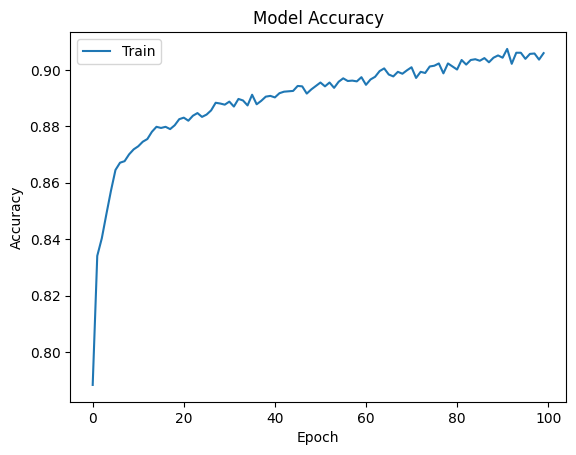

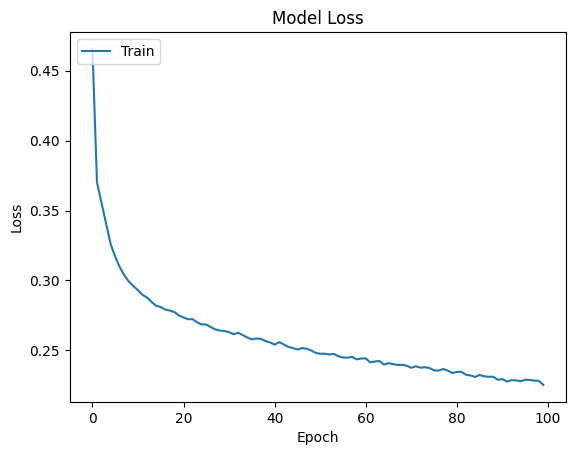

In [36]:
# Plot accuracy over epochs
plt.plot(fit_model.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(fit_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = neural_network_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

77/77 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.3012
Loss: 0.30117782950401306, Accuracy: 0.872107207775116
